## Democracy
### Freedom in the World

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

This is a time series dataset. It contains no missing values.

In [3]:
lied_df = pd.read_csv('../datasets/processed/democracy/lied/lied.csv', header=0)
print(f"Records: {len(lied_df)}")

print(lied_df.info())

lied_df.describe()


Records: 32276
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32276 entries, 0 to 32275
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   countryn                           32276 non-null  object
 1   cow                                32276 non-null  int64 
 2   vdem                               32276 non-null  int64 
 3   year                               32276 non-null  int64 
 4   male_suffrage                      32276 non-null  int64 
 5   female_suffrage                    32276 non-null  int64 
 6   executive_elections                32276 non-null  int64 
 7   legislative_elections              32276 non-null  int64 
 8   multi-party_legislative_elections  32276 non-null  int64 
 9   competitive_elections              32276 non-null  int64 
 10  lexical_index                      32276 non-null  int64 
 11  political_liberties                32276 non-null  i

,cow,vdem,year,male_suffrage,female_suffrage,executive_elections,legislative_elections,multi-party_legislative_elections,competitive_elections,lexical_index,political_liberties,lexical_index_plus,democratic_transition,transition_type,democratic_breakdown,breakdown_type,turnover_period,turnover_event,two_turnover_period,sovereign
count,32276.000000,32276.000000,32276.000000,32276.000000,32276.000000,32276.000000,32276.000000,32276.000000,32276.000000,32276.000000,32276.000000,32276.000000,32276.000000,32276.000000,32276.000000,32276.000000,32276.000000,32276.000000,32276.000000,32276.000000
mean,453.279651,111.865287,1925.858006,0.450768,0.386138,0.426819,0.572933,0.477414,0.239094,2.050998,0.144442,2.176788,0.008334,0.020913,0.004647,0.010379,0.193456,0.025747,0.142087,0.702751
std,266.798136,79.481271,64.854573,0.497578,0.486870,0.494623,0.494973,0.499807,0.426537,2.298500,0.351542,2.527171,0.090913,0.253183,0.068014,0.176332,0.395014,0.158381,0.349145,0.457054
min,2.000000,3.000000,1789.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,225.000000,51.000000,1876.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,434.000000,99.000000,1934.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,678.000000,161.000000,1981.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,990.000000,373.000000,2023.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,6.000000,1.000000,7.000000,1.000000,5.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000


Lexical Index mean is 2.05 and its standard deviation is 2.30.
Lexical Index Plus is the previous index plus the "political_liberties" indicator. Its mean is 2.18 and its standard deviation is 2.53.

I'll keep only the predictors that are boolean indicators. I also took out of the analysis predictors like "democratic_transition" and "democratic_breakdown" as they only happen on specific years.

In [5]:
predictors = ['male_suffrage', 'female_suffrage', 'executive_elections', 'legislative_elections', 'multi-party_legislative_elections', 'competitive_elections', 'political_liberties','sovereign']
lied_df_components = lied_df[predictors]
lied_df_components.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32276 entries, 0 to 32275
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   male_suffrage                      32276 non-null  int64
 1   female_suffrage                    32276 non-null  int64
 2   executive_elections                32276 non-null  int64
 3   legislative_elections              32276 non-null  int64
 4   multi-party_legislative_elections  32276 non-null  int64
 5   competitive_elections              32276 non-null  int64
 6   political_liberties                32276 non-null  int64
 7   sovereign                          32276 non-null  int64
dtypes: int64(8)
memory usage: 2.0 MB


Text(0, 0.5, 'PC2')

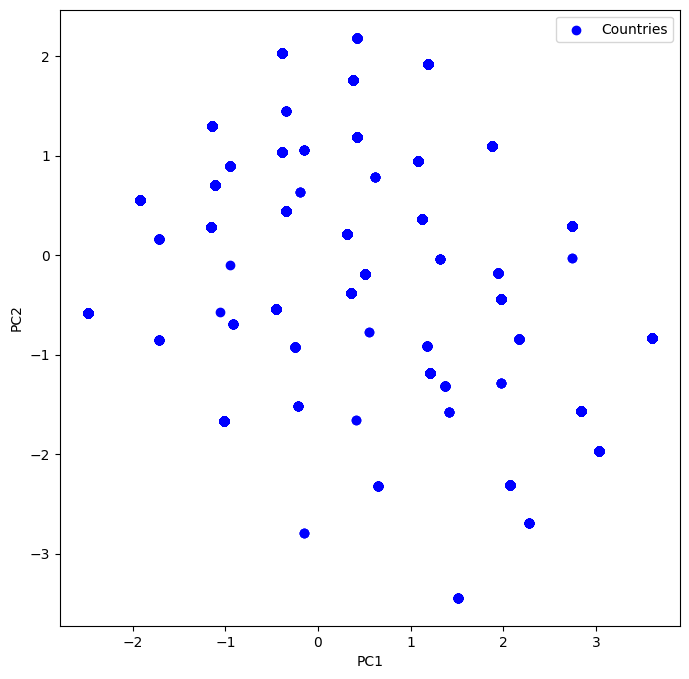

In [6]:
scaler = StandardScaler()
lied_df_scaled = scaler.fit_transform(lied_df_components)
lied_df_scaled = pd.DataFrame(
    lied_df_scaled,
    index=lied_df_components.index,
    columns=lied_df_components.columns
)
lied_df_scaled.describe()

pca = PCA()
pca.fit(lied_df_scaled)
scores = pca.transform(lied_df_scaled)
scores.shape

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:, 0], scores[:, 1], color='blue', label='Countries')
ax.legend()
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

Not many points are visible as the components are boolean indicators so the principal components have a very limited number of possible values.
Plotting the PCA with only two components demonstrated high variance.

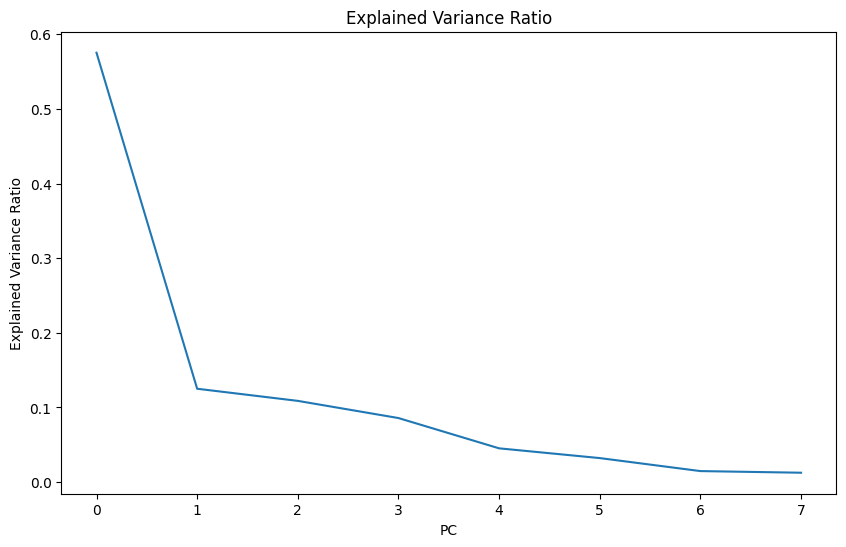

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(pca.explained_variance_ratio_)
plt.title('Explained Variance Ratio')
plt.xlabel('PC')
plt.ylabel('Explained Variance Ratio')
plt.show()

The first principal component explains around 55% of the variance. I'll analyze the loadings of the first principal component to understand which predictors are more important to understand the difference between the countries.

In [8]:
# Print the loadings of the first principal component associated with the predictors
loadings = pd.DataFrame(
    {'Predictor': predictors,
     'Loading': pca.components_[0]
    }
).sort_values(by='Loading', ascending=False)

print("First Principal Component Loadings:")
print(loadings)

First Principal Component Loadings:
                           Predictor   Loading
2                executive_elections  0.398897
0                      male_suffrage  0.382374
3              legislative_elections  0.378125
1                    female_suffrage  0.370290
5              competitive_elections  0.365120
4  multi-party_legislative_elections  0.349790
6                political_liberties  0.303349
7                          sovereign  0.258633


As expected, the most significant predictors to differentiate the countries are if there are executive and legislative elections, if male and female suffrage is allowed.

Having political liberties, which is included in the lexical_index_plus index, isn't as important as the other predictors. For this reason we'll keep working with the lexical_index index rather than the lexical_index_plus index.

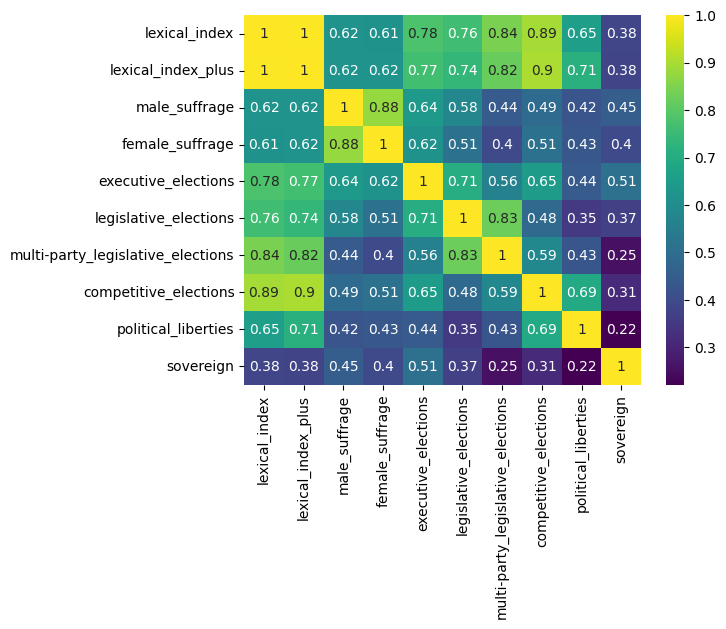

In [9]:
predictors = ['lexical_index','lexical_index_plus','male_suffrage', 'female_suffrage', 'executive_elections', 'legislative_elections', 'multi-party_legislative_elections', 'competitive_elections', 'political_liberties','sovereign']
lied_df_components = lied_df[predictors]
sns.heatmap(lied_df_components.corr(), cmap="viridis", annot = True)
plt.show()

We see a high correlation between countries with executive and legislative elections. Most countries with legislative elections also have multi-party legislative elections. While they're outliers, the indicator of having elections is already a good differentiation factor.

Not many of the countries with executive or legislative elections have real competitive elections, less than that have enough political liberties.

Something that calls my attention is that female suffrage is not thightly correlated with a country policital liberties or competitive elections. This doesn't support the premise of our investigation.

A country being sovereign doesn't seem to be correlated with anything related to suffrage and democracy. I would say these predictors about sovereignty are not important for our analysis.

I'll take a snapshot of the last year and create a new dataset.

In [11]:
lied_df['year'].value_counts().sort_values(ascending=False)

year
2021    198
2022    198
2011    198
2023    198
2018    198
       ... 
1796     77
1794     77
1790     77
1797     77
1789     76
Name: count, Length: 235, dtype: int64

In [12]:
lied_df_snapshot = lied_df[lied_df['year'] == 2021]
lied_df_snapshot.drop(columns=['year'], inplace=True)
lied_df_snapshot.to_csv('../datasets/processed/democracy/lied/lied-snapshot.csv', index=False)

/var/folders/3c/bf3091xd4h9fj5rvqhp6_05r0000gq/T/ipykernel_44315/470174177.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lied_df_snapshot.drop(columns=['year'], inplace=True)
